# Дисциплина «Искусственный интеллект»

## Рабочая тетрадь №4

### Библиотеки

In [35]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Задание 1.3.1

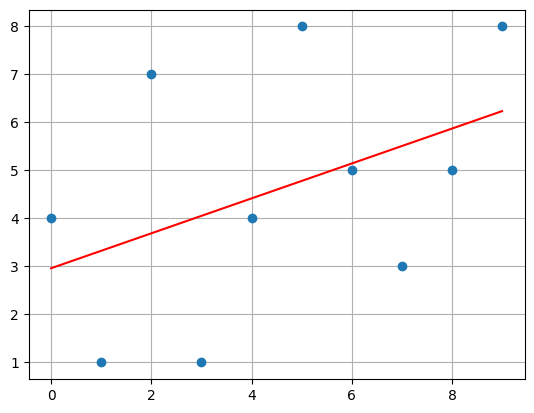

In [22]:
delta = 1.0
x = np.array([i for i in range(10)])
y = np.array([random.randint(0, 10) for i in range(len(x))])

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, 'o')
plt.plot(x, m*x+c, 'r')
plt.grid()

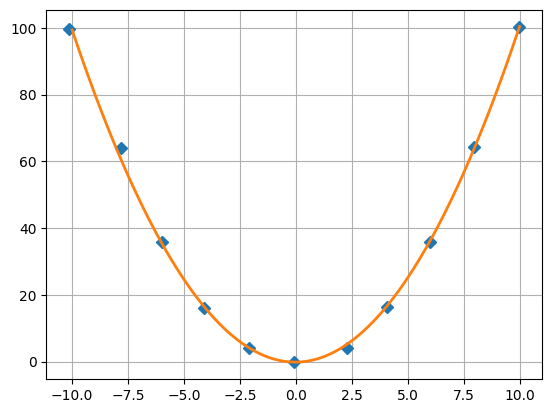

In [29]:
delta = 1.0
x = np.linspace(-10, 10, 11)
y = x**2 + delta*(rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

m = np.vstack((x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-10, 10, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()

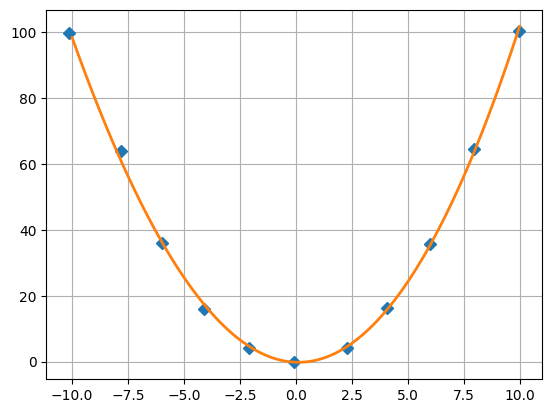

In [30]:
m = np.vstack((x**3, x**2, x, np.ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-10, 10, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=2)
plt.grid()

### Задание 1.3.2

0.0008622828066566727
0.13532431519834412


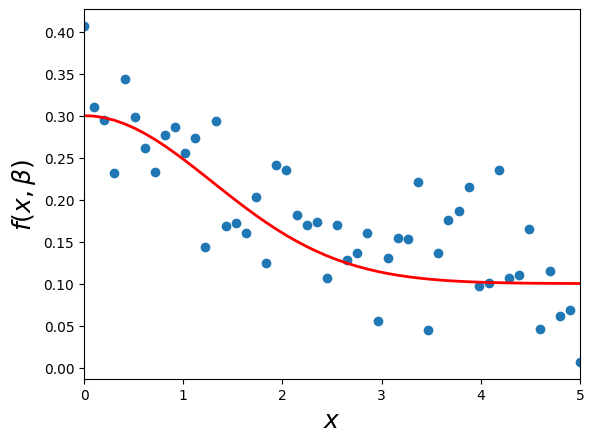

In [34]:
beta = (0.1, 0.2, 0.3)

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print(lin_dev)

resiuals = ydata - f(xdata, *beta_opt)
fres = sum(resiuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

### Задание 2.3.1

-1.4968287526427275
[2.04862579]


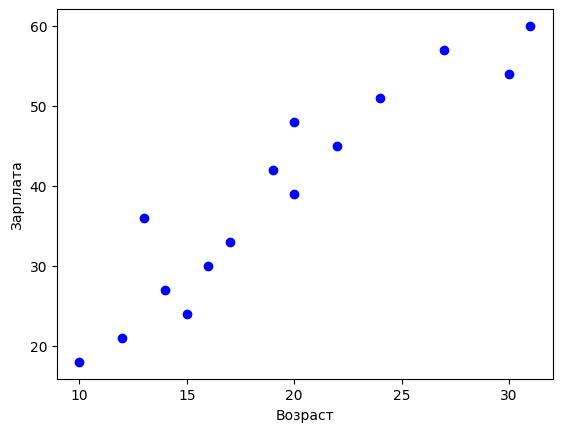

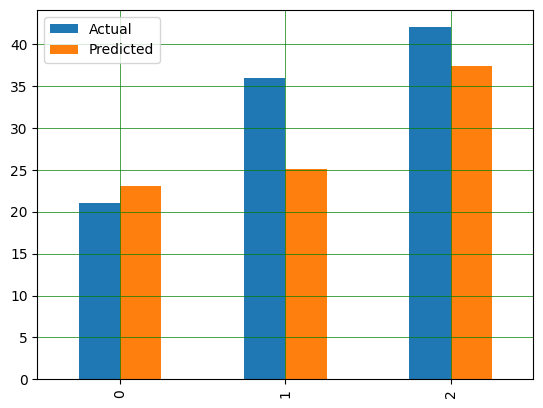

In [42]:
my_dict = {'Зарплата': [10, 12, 15, 14, 16, 17, 13, 20, 19, 22, 20, 24, 30, 27, 31], 'Возраст': [18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]}

dataset = pd.DataFrame(my_dict)

plt.scatter(dataset['Зарплата'], dataset['Возраст'], color='b', label='Данные зарплат')
plt.xlabel('Возраст')
plt.ylabel('Зарплата')

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)

df = DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)

### Задание 3.3.1

425.59933220324154
[-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


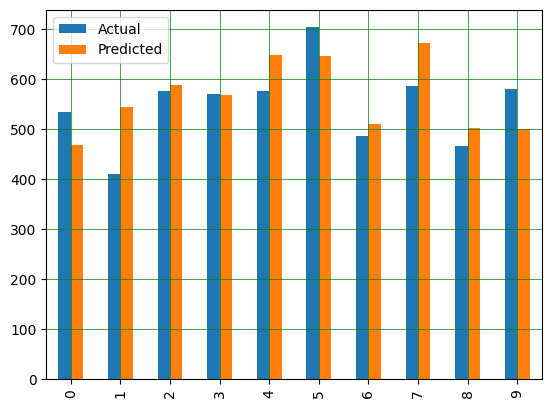

In [44]:
data = pd.read_csv('petrol_consumption.csv')

x = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)

df = DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


### Задание 3.3.2

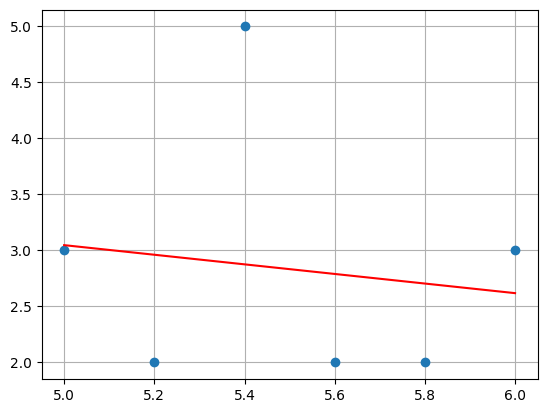

In [49]:
x = np.array([5, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([3, 2, 5, 2, 2, 3])

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, 'o')
plt.plot(x, m*x+c, 'r')
plt.grid()

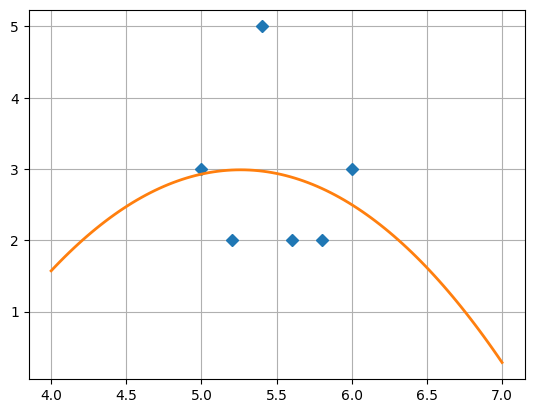

In [53]:
m = np.vstack((x**2, x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(4, 7, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()